# Importing the libraries and data set

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [43]:
data = pd.read_csv('dataframe_.csv')

In [44]:
data.head(10)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
5,-134.366669,-116.000000
6,-115.563739,-126.267621
7,-132.080161,-132.032206
8,-133.366669,-114.000000
9,-119.524112,-94.419855


In [45]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


# Data Analysis

### Features are not named and there are only 2 features so let's Find out:  
* Distribution of input  
* Distibution of output  
* relation between them  
* Are they linearly dependent?

<AxesSubplot:xlabel='input', ylabel='Count'>

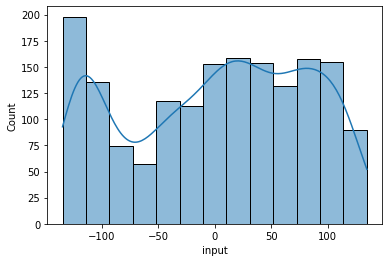

In [46]:
sns.histplot(data = data, x = 'input', kde = True )

<AxesSubplot:xlabel='output', ylabel='Count'>

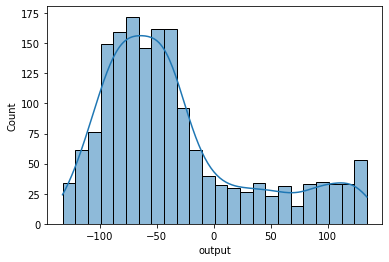

In [47]:
sns.histplot(data = data, x = 'output', kde = True )

<AxesSubplot:xlabel='input', ylabel='output'>

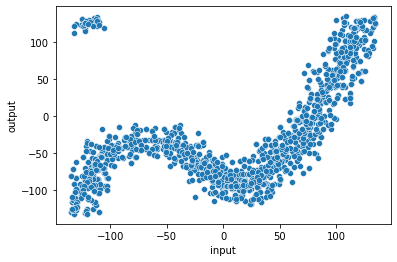

In [48]:
sns.scatterplot(data = data, x = 'input',y = 'output')

> ### So Here we can observe that there is relation Between our input and output which looks like cubic with some outliers.
> ### And **NO** They are Not linearly dependent, they both have a non-linear relationship.

In [49]:
# pearsons correlation
correlation = data['input'].corr(data['output'])
correlation

0.511775700483678

In [50]:
# spearman correlation
correlation = data['input'].corr(data['output'], method='spearman')
correlation

0.5323596961452608

# Data_Preprocessing

In [51]:
data.shape

(1697, 2)

In [52]:
#checking for the null values
data.isna().sum()

input     1
output    1
dtype: int64

> Since there is only one null value compared to the 1697 examples we have, we can remove the null value.

In [53]:
data.dropna(inplace = True)

In [54]:
#lets see if we have any duplicate examples:
data.duplicated().sum()

606

> There are approximately 50% od duplicated rows So, Let's Leave it as it is.

## Outlier_detection

<AxesSubplot:xlabel='input'>

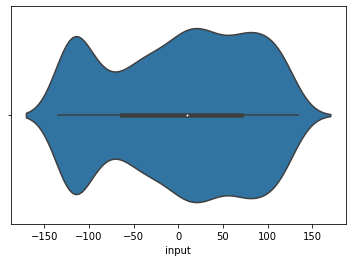

In [55]:
sns.violinplot(x = data['input'])

<AxesSubplot:xlabel='output'>

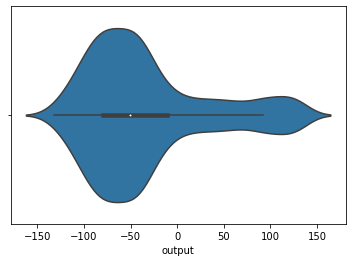

In [56]:
sns.violinplot(x = data['output'])

In [57]:
def outlierdetector(series : pd.Series):
    z_score = (series - series.mean())/series.std()
    return series[abs(z_score) > 3].to_list()

In [58]:
outlierdetector(data['input'])

[]

In [59]:
outlierdetector(data['output'])

[]

## Feature_Engineering

> We know that our input and output are having some kind of relationship let's try some mathematical operations on input to draw conclusions

In [60]:
operation_dict = {
                'log_input' : np.log,
                'log2_input' : np.log2,
                'sqrt_input': np.sqrt,
                'cbrt_input': np.cbrt
}

In [61]:
def feature_engineering(operation,input = data['input']):
    data[operation] = operation_dict[operation](input)
    print('scatter_plot',sns.scatterplot(data = data, x = operation,y = 'output'))
    print('pearson_coeff : ',data[operation].corr(data['output']))
    print('spearmans_coeff : ',data[operation].corr(data['output'],method = 'spearman'))

scatter_plot AxesSubplot(0.125,0.125;0.775x0.755)
pearson_coeff :  0.869695031249155
spearmans_coeff :  0.927459749976135


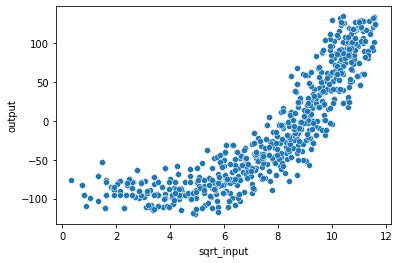

In [62]:
feature_engineering('sqrt_input')

scatter_plot AxesSubplot(0.125,0.125;0.775x0.755)
pearson_coeff :  0.4027593145038668
spearmans_coeff :  0.5323596961452608


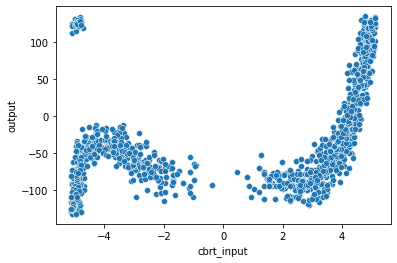

In [63]:
feature_engineering('cbrt_input')

pearson_coeff :  0.5625607443364609
spearmans_coeff :  0.5323596961452608


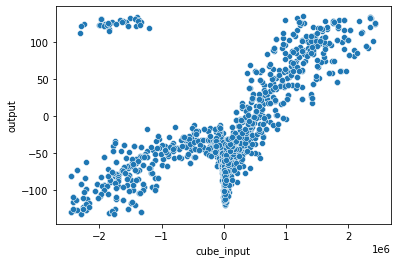

In [64]:
data['cube_input'] = data['input']**3
sns.scatterplot(data = data, x = 'cube_input',y = 'output')
print('pearson_coeff : ',data['cube_input'].corr(data['output']))
print('spearmans_coeff : ',data['cube_input'].corr(data['output'],method = 'spearman'))

pearson_coeff :  0.4350463971851659
spearmans_coeff :  0.40041006449633726


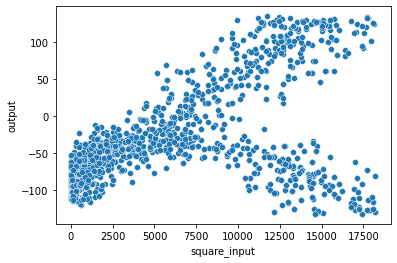

In [65]:
data['square_input'] = data['input']**2
sns.scatterplot(data = data, x = 'square_input',y = 'output')
print('pearson_coeff : ',data['square_input'].corr(data['output']))
print('spearmans_coeff : ',data['square_input'].corr(data['output'],method = 'spearman'))

scatter_plot AxesSubplot(0.125,0.125;0.775x0.755)
pearson_coeff :  0.7352352021315244
spearmans_coeff :  0.927459749976135


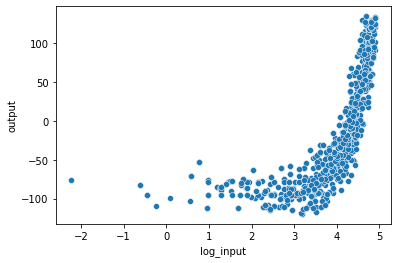

In [66]:
feature_engineering('log_input')

In [67]:
data.isna().sum()

input             0
output            0
sqrt_input      763
cbrt_input        0
cube_input        0
square_input      0
log_input       763
dtype: int64

In [68]:
data.shape

(1696, 7)

In [69]:
data.fillna(value = 0, inplace = True)

In [70]:
X = data.drop('output',axis = 1)
y = data['output']

In [71]:
X.shape

(1696, 6)

## Feature_selection

In [72]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(X,y)

array([1.40390529, 0.97611036, 1.39091376, 1.40627598, 1.08849405,
       0.96459718])

In [73]:
imp = pd.DataFrame(mutual_info_regression(X,y),index = X.columns)
imp.columns = ['importance']
imp.sort_values(by = 'importance',ascending = False)

,importance
cube_input,1.409530
input,1.403794
cbrt_input,1.393559
square_input,1.087889
sqrt_input,0.978747
log_input,0.962507


## Train_test_split

In [74]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

# Model_selection

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

def compare_regression_models( eval_metric):
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(random_state=0),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
        'Polynomial Regression': PolynomialFeatures(degree=3),
        'SVM': SVR()
    }
    
    results = {}
    for name, model in models.items():
        if name == 'Polynomial Regression':
            x_train_poly = model.fit_transform(x_train)
            x_test_poly = model.fit_transform(x_test)
            regressor = LinearRegression()
            regressor.fit(x_train_poly, y_train)
            y_pred = regressor.predict(x_test_poly)
        else:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        
        
            score = eval_metric(y_test, y_pred)
      
        results[name] = score
        
    return results



In [76]:
x_train.shape

(1136, 6)

In [77]:
y_train.shape

(1136,)

In [82]:
print('mean_squared_error: ', compare_regression_models(mean_squared_error))

mean_squared_error:  {'Linear Regression': 1470.5252993637134, 'Random Forest Regressor': 1279.0973256961177, 'Decision Tree Regressor': 1514.1928493593657, 'Polynomial Regression': 1514.1928493593657, 'SVM': 1977.6706152630538}


In [83]:
print('mean_absolute_error: ',compare_regression_models(mean_absolute_error))
print('mean_absolute_percentage_error: ', compare_regression_models(mean_absolute_percentage_error))
print('r2_score: ', compare_regression_models(r2_score))


mean_absolute_error:  {'Linear Regression': 21.398542759922204, 'Random Forest Regressor': 19.343163778207074, 'Decision Tree Regressor': 16.81144085979685, 'Polynomial Regression': 16.81144085979685, 'SVM': 28.364516278209084}
mean_absolute_percentage_error:  {'Linear Regression': 0.523495986876091, 'Random Forest Regressor': 0.536552626972377, 'Decision Tree Regressor': 0.4068675537625571, 'Polynomial Regression': 0.4068675537625571, 'SVM': 0.7178605712514533}
r2_score:  {'Linear Regression': 0.6662402107643708, 'Random Forest Regressor': 0.7096879230701336, 'Decision Tree Regressor': 0.6563291454537016, 'Polynomial Regression': 0.6563291454537016, 'SVM': 0.5511352793363702}


## From above we can say that Random_forest_regressor is fitting our well, So lets do hyperparameter tuning.

###  Here in our data the correlation for the negative numbers is not showing any relations with output that is why linear regression and other models are having problem with the data. Since  the relationship between our input and output is non-linear, and the Random Forest Regressor is the best fit for our data. It is because the algorithm is able to capture complex relationships between the input variables and the output, making it an ideal solution for non-linear problems. 

# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


model = RandomForestRegressor()

param_grid = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV to tune the hyperparameters
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error')
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)


Best hyperparameters:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 90}


In [89]:
best_params = random_search.best_params_
final_model = RandomForestRegressor(**best_params)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print("R2 Score: ", final_model.score(x_test, y_test))


R2 Score:  0.7098923930161213



# R2 Score:  0.7098923930161213
